<a href="https://colab.research.google.com/github/YangTaeSung/CAU-MachineLearning/blob/master/assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np


file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
data    	= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count   	= 0     # count for the number of images


# normalize the values of the input data to be [0, 1]
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

# example of distance function between two vectors x and y
def distance(x, y):
    d = (x - y) ** 2
    s = np.sum(d)
    #r = np.sqrt(s)
    return(s)

# Square
def square(data):
    d = (data) ** 2
    return(d)

# Sqrt
def sqrt(data):
    r = np.sqrt(data)
    return(r)

# make a matrix each column of which represents an images in a vector form
list_image  = np.empty((size_row * size_col, num_image), dtype=float) # empty( 28*28 , 10000 )
list_label  = np.empty(num_image, dtype=int) # empty( 10000 )

# make a matrix of L2 Norm (0 to 9)
# Initialize to 0
L2_Norm  = np.zeros((size_row * size_col, 10), dtype=float) 


# label counter
# Initialize to 0
cnt = np.zeros((size_row * size_col, 10), dtype=float)

for line in data:
    line_data   = line.split(',') 
    label       = int(line_data[0])   # Convert string to integer type
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    
    list_label[count]       = label
    list_image[:, count]    = im_vector
    
    im_vector   = square(im_vector)    #  Square
    L2_Norm[:, label] += im_vector     #  Sum
    cnt[:, label] += 1                 #  n Count
    
    count += 1


In [0]:
L2_Norm = L2_Norm / cnt  #  Divide n

L2_Norm = sqrt(L2_Norm)   #  R M S

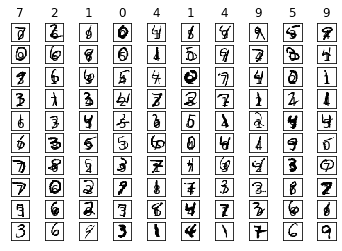

In [13]:
# plot first 100 images out of 10,000 with their labels
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()



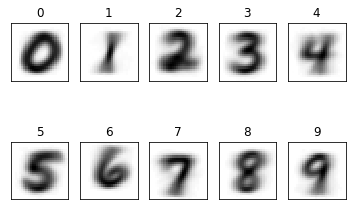

In [15]:
for i in range(10):

    label = i
    im_matrix   = L2_Norm[:, i].reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()